In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [18]:
df = pd.read_csv(r"C:\Users\91939\Downloads\iris\iris_data.csv")
df.head()

,sepal_length,sepal_width,petal_length,petalwidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# To display stats about the data
df.describe()

,sepal_length,sepal_width,petal_length,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.820000,3.041333,3.758667,1.198667
std,0.898321,0.450829,1.764420,0.763161
min,1.500000,1.500000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# To display the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petalwidth    150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocess the Dataset

In [25]:
# Check for null values
df.isnull().all()

sepal_length    False
sepal_width     False
petal_length    False
petalwidth      False
Species         False
dtype: bool

# Exploratory Data Analysis

<Axes: >

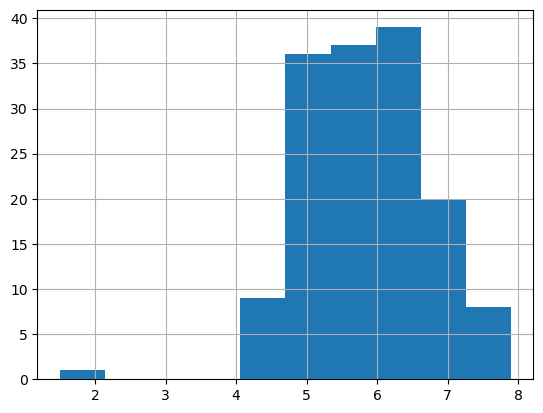

In [26]:
df['sepal_length'].hist()

<Axes: >

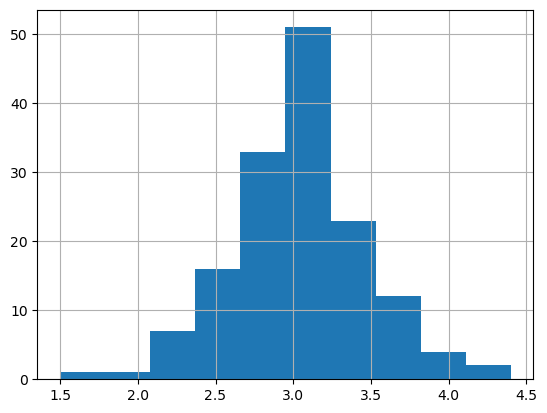

In [27]:
df['sepal_width'].hist()

<Axes: >

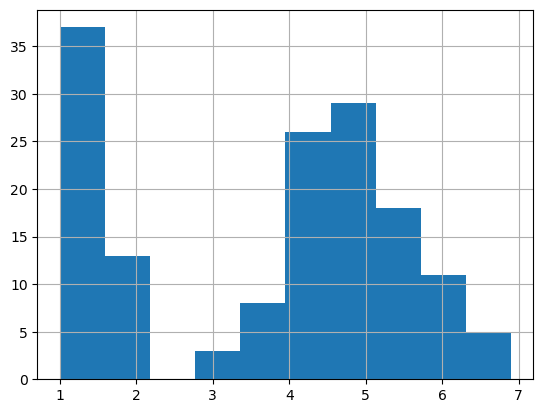

In [28]:
df['petal_length'].hist()

<Axes: >

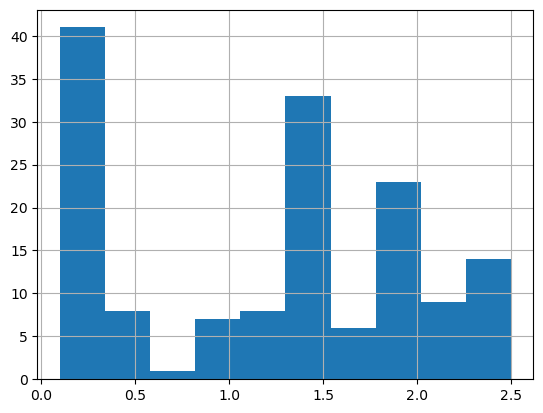

In [30]:
df['petalwidth'].hist()

In [31]:
# Scatter plots
colors = ['red' , 'orange' , 'blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

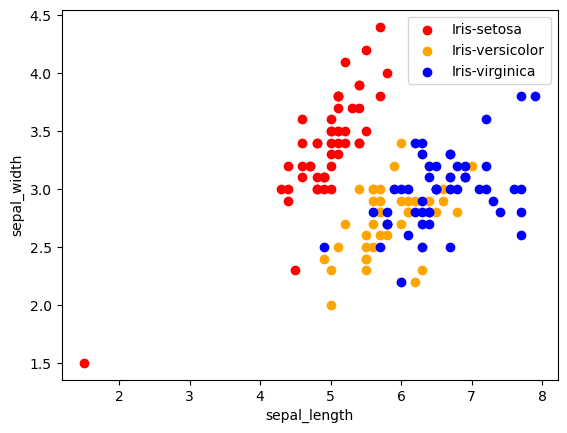

In [33]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

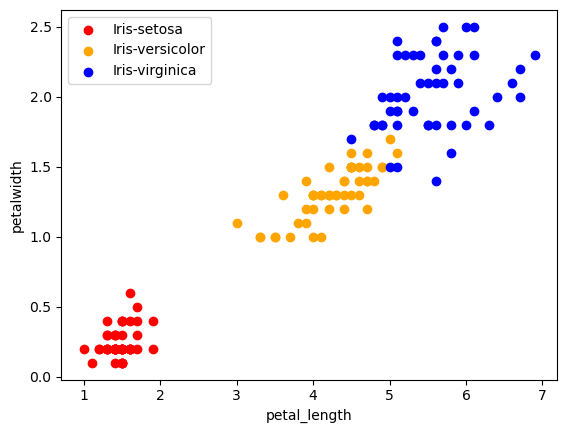

In [35]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['petal_length'],x['petalwidth'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petalwidth')
plt.legend()

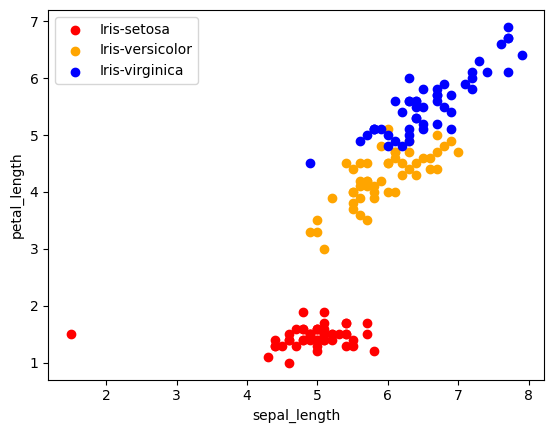

In [36]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

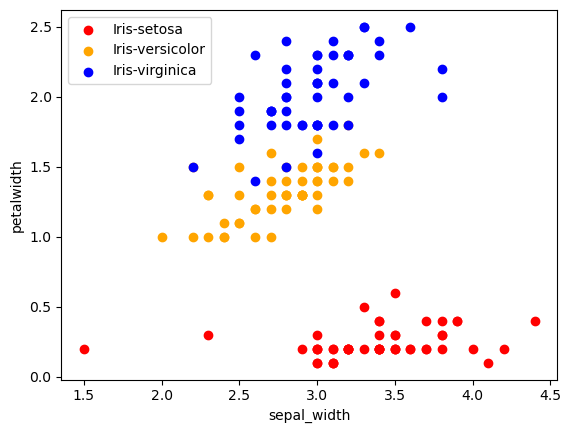

In [37]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['sepal_width'],x['petalwidth'],c=colors[i],label=species[i])
plt.xlabel('sepal_width')
plt.ylabel('petalwidth')
plt.legend()

# Correlation Matrix

In [38]:
df.corr()

C:\Users\91939\AppData\Local\Temp\ipykernel_10700\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petalwidth
sepal_length,1.000000,0.018991,0.837051,0.788202
sepal_width,0.018991,1.000000,-0.368232,-0.305901
petal_length,0.837051,-0.368232,1.000000,0.962757
petalwidth,0.788202,-0.305901,0.962757,1.000000


C:\Users\91939\AppData\Local\Temp\ipykernel_10700\2126751307.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

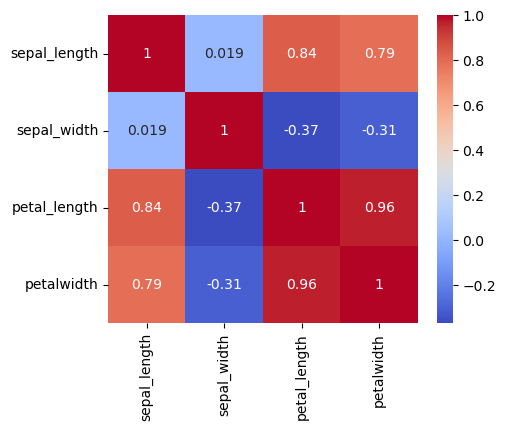

In [41]:
corr = df.corr()
fig , ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True,ax=ax , cmap = 'coolwarm')

# Label Encoder

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,sepal_length,sepal_width,petal_length,petalwidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [86]:
from sklearn.model_selection import train_test_split
# train - 70
# Test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.30)

In [87]:
# Logistic Regreession
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [88]:
model.fit(x_train, y_train)

LogisticRegression()

In [89]:
# print metric to get performance
print('Accuracy :', model.score(x_test, y_test) * 100)

Accuracy : 97.14285714285714


In [90]:
# knn - k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [91]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [92]:
# print metric to get performance
print('Accuracy :', model.score(x_test, y_test) * 100)

Accuracy : 95.23809523809523


In [93]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [94]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
# print metric to get performance
print('Accuracy :', model.score(x_test, y_test) * 100)

Accuracy : 94.28571428571428
